# Assignment – Preprocessing Data for scikit-learn

Very often, we’re tasked with taking data in one form and transforming it for easier downstream analysis.  In this 
assignment, you’ll use what you’ve learned in the course to prepare data for predictive analysis in Project 4. 
Mushrooms Dataset.  A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository 
here: https://archive.ics.uci.edu/ml/datasets/Mushroom.  The fact that this is such a well-known dataset in the 
data science community has made it a good dataset to use for comparative benchmarking.  For example, if someone 
was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, 
this dataset could be useful.  In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute 
or attributes are the best predictors of whether a particular mushroom is poisonous or edible?” 

# Import libraries

In [1]:
import urllib.request
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns

# Read data 

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# Create a pandas DataFrame with a subset of the columns in the dataset.  You should include the column that indicates edible or poisonous

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                            sep=',', 
                            header=None, 
                            usecols=[0,5,21], 
                            names=['Edible/Poisonous','Odor','Population'])
df.head(20)

,Edible/Poisonous,Odor,Population
0,p,p,s
1,e,a,n
2,e,l,n
3,p,p,s
4,e,n,a
5,e,a,n
6,e,a,n
7,e,l,s
8,p,p,v
9,e,a,s


# Replace the codes used in the data with numeric values

In [4]:
df['Edible/Poisonous'].replace({'e':0, 'p': 1}, inplace=True)
df['Odor'].replace({'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}, inplace=True)
df['Population'].replace({'a':0, 'c':1, 'n':2, 's':3, 'v':4, 'y':5}, inplace=True)

df

,Edible/Poisonous,Odor,Population
0,1,7,3
1,0,0,2
2,0,1,2
3,1,7,3
4,0,6,0
...,...,...,...
8119,0,6,1
8120,0,6,4
8121,0,6,1
8122,1,3,4


# This graph shows the data in the "Edible/Poisonous" column. This data shows that there are more edible mushrooms than poisonous.

<AxesSubplot:xlabel='Edible/Poisonous', ylabel='count'>

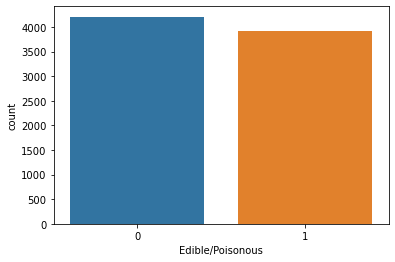

In [5]:
sns.countplot(x = 'Edible/Poisonous', data = df)

# This graph shows the data in the "Odor" column.

<AxesSubplot:xlabel='Odor', ylabel='count'>

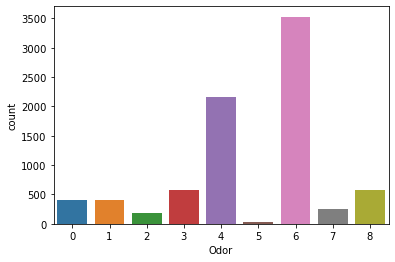

In [6]:
sns.countplot(x = 'Odor', data = df)

# This graph shows the data in the "Population" column.

<AxesSubplot:xlabel='Population', ylabel='count'>

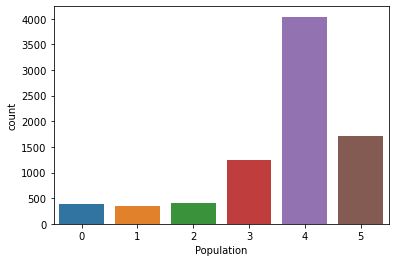

In [7]:
sns.countplot(x = 'Population', data = df)

# This scatterplot shows the distribution of data between Edible/Poisonous mushrooms vs. odor vs. population

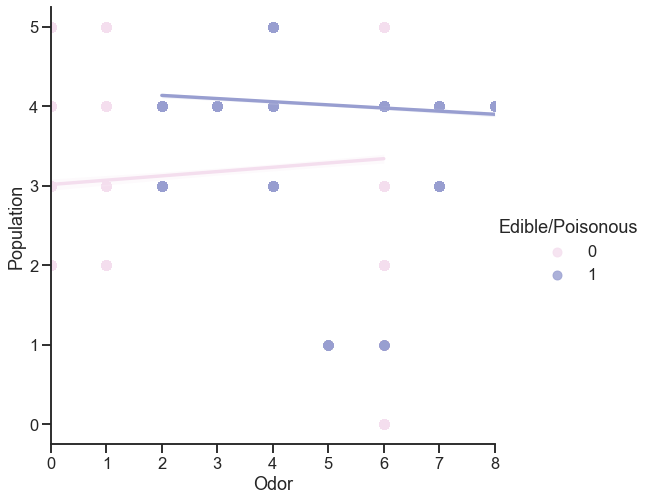

In [9]:
sns.set(style="ticks", context="talk")
pal = sns.cubehelix_palette(4, 1.5, .75, light=.9, dark=.1)
g = sns.lmplot(x='Odor', y='Population', hue='Edible/Poisonous', data=df, palette=pal, height=7)
g.set_axis_labels('Odor', 'Population')
plt.show()

# Conclusion
Based on the above exploratory analysis, Odor category is the most reliable predictor for poisonous vs edible mushrooms. The other traits have too many overlaps between the poisonous and edible mushrooms and so is less reliable.